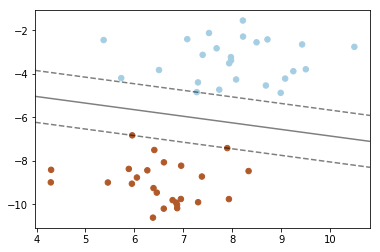

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# 先创建50个数据点，让它们分为两类
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# 创建一个线性内核的支持向量机模型
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
# 把数据点画出来
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

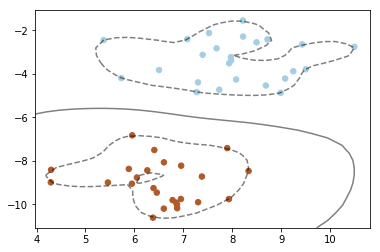

In [2]:
# 创建一个RBF内核的支持向量机模型
clf_rbf = svm.SVC(kernel='rbf', C=1000)
clf_rbf.fit(X, y)
# 把数据点画出来
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)

# 把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

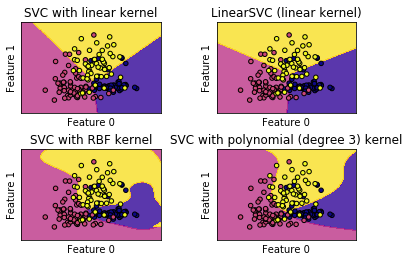

In [3]:
from sklearn.datasets import load_wine
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# 使用酒的数据集
wine = load_wine()
# 选取数据集的前两个特征
X = wine.data[:, :2]
y = wine.target


C = 1.0  # SVM 正则化参数
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)


titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')


fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

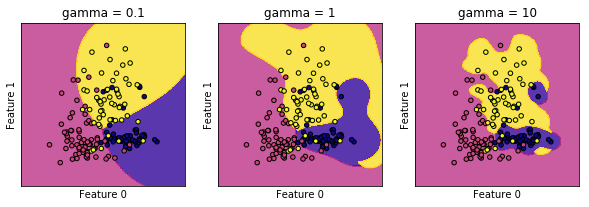

In [4]:
C = 1.0  # SVM 正则化参数
models = (svm.SVC(kernel='rbf', gamma=0.1, C=C),
          svm.SVC(kernel='rbf', gamma=1, C=C),
          svm.SVC(kernel='rbf', gamma=10, C=C))
models = (clf.fit(X, y) for clf in models)


titles = ('gamma = 0.1',
          'gamma = 1',
          'gamma = 10',
          )


fig, sub = plt.subplots(1, 3,figsize = (10,3))
#plt.subplots_adjust(wspace=0.8, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.plasma, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.plasma, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [11]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [12]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [42]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
print(X_train.shape)
print(X_test.shape)

(379, 13)
(127, 13)


In [47]:
from sklearn.svm import SVR
for kernel in ['linear','rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    print(kernel,'核函数的模型训练集得分：{:.3f}'.format(
        svr.score(X_train, y_train)))
    print(kernel,'核函数的模型测试集得分：{:.3f}'.format(
        svr.score(X_test, y_test)))

linear 核函数的模型训练集得分：0.709
linear 核函数的模型测试集得分：0.696
rbf 核函数的模型训练集得分：0.145
rbf 核函数的模型测试集得分：0.001


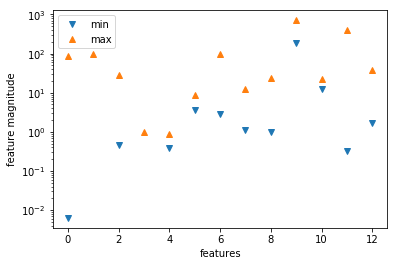

In [53]:
plt.plot(X.min(axis=0),'v',label='min')
plt.plot(X.max(axis=0),'^',label='max')
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel('features')
plt.ylabel('feature magnitude')
plt.show()

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
plt.plot(X_train_scaled.min(axis=0),'v',label='train set min')
plt.plot(X_train_scaled.max(axis=0),'^',label='train set max')
plt.plot(X_test_scaled.min(axis=0),'v',label='test set min')
plt.plot(X_test_scaled.max(axis=0),'^',label='test set max')
plt.yscale('log')
plt.legend(loc='best')
plt.xlabel('scaled features')
plt.ylabel('scaled feature magnitude')
plt.show()

NameError: name 'X_train' is not defined

In [72]:
for kernel in ['linear','rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train)
    print('数据预处理后',kernel,'核函数的模型训练集得分：{:.3f}'.format(
        svr.score(X_train_scaled, y_train)))
    print('数据预处理后',kernel,'核函数的模型测试集得分：{:.3f}'.format(
        svr.score(X_test_scaled, y_test)))

数据预处理后 linear 核函数的模型训练集得分：0.705
数据预处理后 linear 核函数的模型测试集得分：0.698
数据预处理后 rbf 核函数的模型训练集得分：0.665
数据预处理后 rbf 核函数的模型测试集得分：0.694


In [1]:
svr = SVR(C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)
print('调节参数后的模型在训练集得分：{:.3f}'.format(
        svr.score(X_train_scaled, y_train)))
print('调节参数后的模型在测试集得分：{:.3f}'.format(
        svr.score(X_test_scaled, y_test)))

NameError: name 'SVR' is not defined